In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [27]:
#read in train and test data

train=pd.read_csv('train.csv')

test=pd.read_csv('test.csv')

In [28]:
train.head()

,pitch_uid,game_pk,game_date,pitcher,pitcher_name,batter,batter_name,pitch_type,release_speed,release_pos_x,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing
0,0,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",FF,95.2,2.19,...,0,0,0,Standard,Standard,144.0,0.0,-0.042,heart,0
1,1,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",FF,94.9,1.96,...,0,0,0,Standard,Standard,148.0,0.0,0.032,chase,0
2,2,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",SL,87.9,2.25,...,0,0,0,Standard,Standard,139.0,0.0,-0.060,chase,1
3,3,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",SL,88.2,2.44,...,0,0,0,Standard,Standard,132.0,0.0,0.035,waste,0
4,4,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",FF,95.8,1.93,...,0,0,0,Standard,Standard,149.0,0.0,0.104,chase,0


In [29]:
for col in train.columns:
    print(col)

pitch_uid
game_pk
game_date
pitcher
pitcher_name
batter
batter_name
pitch_type
release_speed
release_pos_x
release_pos_z
events
description
spin_dir
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignment
spin_axis
delta_home_win_exp
delta_run_exp
attack_zone
swing


In [30]:
train.describe()

,pitch_uid,game_pk,pitcher,batter,release_speed,release_pos_x,release_pos_z,spin_dir,zone,hit_location,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,swing
count,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,0.0,1.443276e+06,319749.000000,...,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.398504e+06,1.443276e+06
mean,7.698318e+05,6.425750e+05,6.024542e+05,6.005614e+05,8.877201e+01,-7.478390e-01,5.842720e+00,NaN,9.117471e+00,5.072907,...,2.237736e+00,2.273386e+00,2.321176e+00,2.220541e+00,2.268331e+00,2.273386e+00,1.761407e+02,1.194817e-04,1.297336e-04,4.701388e-01
std,4.870005e+05,1.550122e+04,6.360883e+04,6.308278e+04,6.088537e+00,1.871580e+00,5.396635e-01,NaN,4.218107e+00,2.628443,...,2.568731e+00,2.663576e+00,2.649148e+00,2.595855e+00,2.582028e+00,2.663576e+00,7.143771e+01,2.831707e-02,2.444341e-01,4.991077e-01
min,0.000000e+00,6.300990e+05,4.053950e+05,4.053950e+05,3.010000e+01,-5.340000e+00,8.700000e-01,NaN,1.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.410000e-01,-1.538000e+00,0.000000e+00
25%,3.608188e+05,6.325230e+05,5.718000e+05,5.704820e+05,8.450000e+01,-2.080000e+00,5.590000e+00,NaN,5.000000e+00,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.340000e+02,0.000000e+00,-6.700000e-02,0.000000e+00
50%,7.216375e+05,6.337920e+05,6.087180e+05,6.083480e+05,8.970000e+01,-1.450000e+00,5.880000e+00,NaN,1.100000e+01,5.000000,...,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.990000e+02,0.000000e+00,-1.800000e-02,0.000000e+00
75%,1.132917e+06,6.614250e+05,6.567560e+05,6.567160e+05,9.370000e+01,1.100000e+00,6.170000e+00,NaN,1.300000e+01,8.000000,...,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.210000e+02,0.000000e+00,3.800000e-02,1.000000e+00
max,1.745419e+06,7.071170e+05,8.013890e+05,6.910230e+05,1.038000e+02,4.670000e+00,7.930000e+00,NaN,1.400000e+01,9.000000,...,2.900000e+01,2.900000e+01,2.400000e+01,2.900000e+01,2.900000e+01,2.900000e+01,3.600000e+02,9.100000e-01,3.653000e+00,1.000000e+00


In [31]:
# aggregations of swing data 

pitch_type_percentage=train.groupby('pitch_name')['swing'].agg('mean')*100

outs_percentage=train.groupby('outs_when_up')['swing'].agg('mean')*100




Text(0, 0.5, 'Percentage')

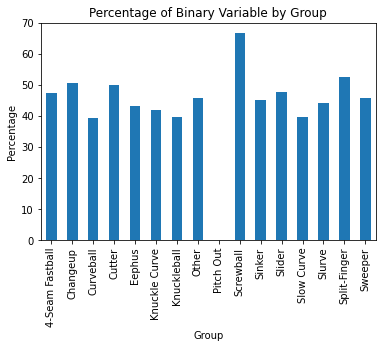

In [32]:
pitch_type_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

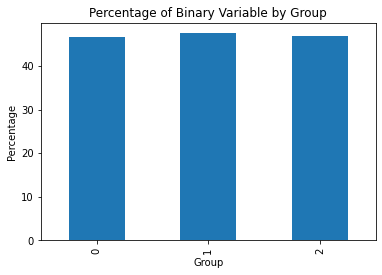

In [33]:
outs_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

In [34]:
#feature Engineering

#add on base and in scoring position

train['on_base']=train[['on_1b','on_2b','on_3b']].notna().all(axis=1).astype(int)

train['bases_empty']=train[['on_1b','on_2b','on_3b']].isna().all(axis=1).astype(int)

train['scoring_position']=train[['on_2b','on_3b']].notna().all(axis=1).astype(int)

# add to test 

test['on_base']=test[['on_1b','on_2b','on_3b']].notna().all(axis=1).astype(int)

test['bases_empty']=test[['on_1b','on_2b','on_3b']].isna().all(axis=1).astype(int)

test['scoring_position']=test[['on_2b','on_3b']].notna().all(axis=1).astype(int)

In [35]:
onbase_percentage=train.groupby('on_base')['swing'].agg('mean')*100

bases_empty_percentage=train.groupby('bases_empty')['swing'].agg('mean')*100

scoring_position_percentage=train.groupby('scoring_position')['swing'].agg('mean')*100

Text(0, 0.5, 'Percentage')

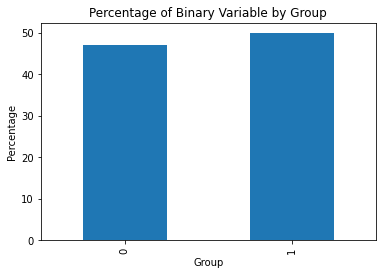

In [36]:
onbase_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

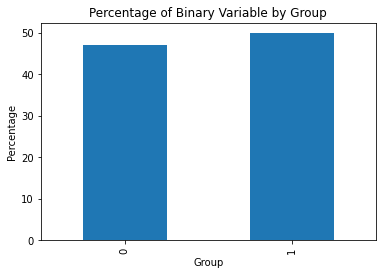

In [37]:
onbase_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

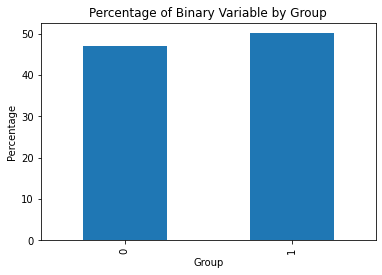

In [38]:
scoring_position_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

In [39]:
sample = pd.read_csv('sample_solution.csv')

type_map = {v:i for i, v in enumerate(train["type"].unique())}
attack_zone_map = {v:i for i, v in enumerate(train["attack_zone"].unique())}
pitch_type_map = {v:i for i, v in enumerate(train["pitch_type"].unique())}

train["type"] = train["type"].apply(lambda x: type_map[x])
train["attack_zone"] = train["attack_zone"].apply(lambda x: attack_zone_map[x])
train["pitch_type"] = train["pitch_type"].apply(lambda x: pitch_type_map[x])

test["type"] = test["type"].apply(lambda x: type_map[x])
test["attack_zone"] = test["attack_zone"].apply(lambda x: attack_zone_map[x])

test["pitch_type"] = test["pitch_type"].apply(lambda x: pitch_type_map[x])


In [40]:
# select features X and Y
X=train[['attack_zone','strikes','type','pitch_type']]
y=train['swing']

XTest=test[['attack_zone','strikes','type','pitch_type']]



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create an instance of the logistic regression model with cross-entropy loss
logreg = LogisticRegression(solver='lbfgs', multi_class='auto')

# fit the model on the training dataset
logreg.fit(X_train, y_train)

# make predictions on the testing dataset
y_pred = logreg.predict(X_test)

# compute the log loss on the testing dataset
loss = log_loss(y_test, logreg.predict_proba(X_test))


# print the log loss
print("Log loss: {:.4f}".format(loss))

Log loss: 0.6617


In [42]:
#catboost model
import catboost as cb

# create an instance of the CatBoostClassifier model with log loss
model = cb.CatBoostClassifier(loss_function='Logloss')

# fit the model on the training dataset
model.fit(X_train, y_train)

# make predictions on the testing dataset
y_pred = model.predict(X_test)

# compute the log loss on the testing dataset
loss = log_loss(y_test, model.predict_proba(X_test))

# print the log loss
print("Log loss: {:.4f}".format(loss))

Learning rate set to 0.20353
0:	learn: 0.3528376	total: 116ms	remaining: 1m 56s
1:	learn: 0.2866861	total: 198ms	remaining: 1m 38s
2:	learn: 0.2658942	total: 284ms	remaining: 1m 34s
3:	learn: 0.2592728	total: 377ms	remaining: 1m 33s
4:	learn: 0.2546824	total: 477ms	remaining: 1m 34s
5:	learn: 0.2525411	total: 597ms	remaining: 1m 38s
6:	learn: 0.2504930	total: 702ms	remaining: 1m 39s
7:	learn: 0.2495862	total: 811ms	remaining: 1m 40s
8:	learn: 0.2490004	total: 911ms	remaining: 1m 40s
9:	learn: 0.2481647	total: 1s	remaining: 1m 39s
10:	learn: 0.2478881	total: 1.09s	remaining: 1m 37s
11:	learn: 0.2463009	total: 1.19s	remaining: 1m 37s
12:	learn: 0.2458285	total: 1.27s	remaining: 1m 36s
13:	learn: 0.2456315	total: 1.36s	remaining: 1m 35s
14:	learn: 0.2454469	total: 1.45s	remaining: 1m 35s
15:	learn: 0.2451796	total: 1.55s	remaining: 1m 35s
16:	learn: 0.2450618	total: 1.66s	remaining: 1m 36s
17:	learn: 0.2449879	total: 1.75s	remaining: 1m 35s
18:	learn: 0.2448350	total: 1.85s	remaining: 1m 

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

# fit the classifier on the training data
rf.fit(X_train, y_train)

# predict the probabilities of each class for the test data
y_pred_proba = rf.predict_proba(X_test)

# calculate the log loss of the predictions compared to the true labels
loss = log_loss(y_test, y_pred_proba)

print('Log Loss:', loss)

Log Loss: 0.24529292627912913


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

# create a Gradient Boosted Classifier object
gbc = GradientBoostingClassifier(loss='deviance', random_state=42)

# fit the Gradient Boosted Classifier on the training data
gbc.fit(X_train, y_train)

# use the Gradient Boosted Classifier to make predictions on the test data
y_pred = gbc.predict_proba(X_test)

# calculate the log loss on the test data
log_loss_score = log_loss(y_test, y_pred)

print(log_loss_score)

0.24675285383646753


In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# create a Neural Network Classifier object
nn = MLPClassifier(activation='relu', random_state=42)

# fit the Neural Network Classifier on the training data
nn.fit(X_train, y_train)

# use the Neural Network Classifier to make predictions on the test data
y_pred = nn.predict_proba(X_test)

# calculate the log loss on the test data
log_loss_score = log_loss(y_test, y_pred)
print(log_loss_score)

0.24603286720983134


In [50]:
predictions = model.predict_proba(XTest)

In [51]:
#submission pred

sample["swing"] = predictions[:, 1]

sample.to_csv("submission.csv", index=False)